# Derogatory Language Project

### Disclaimer: This work includes derogatory language that some people may find profane, vulgar, or offensive. The derogatory terms are used only for the purpose of finding them within museum collections. The inclusion of the offensive language is not meant to promote or condone any discriminatory or harmful beliefs. Reader discretion is advised.

## Set up and data download

The below two cells import the necessary libraries, set up the way dataframes are displayed, and selects the color pallete for data visualizations, like charts and graphs.

In [1]:
# necessary library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import re

# dataframe display settings    
pd.options.display.max_colwidth = 3000
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [2]:
# change the default color scheme
# to change default colormap
plt.rcParams["image.cmap"] = "Set3"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)

In this project the data from the Harvard University Herbaria is used: Vascular Plants of North America [data](https://ipt.huh.harvard.edu/ipt/resource?r=huh_vascular_plants_north_america). The data is in the Darwin Core Archive (DwC-A) format. Python provides a library called [Python-dwca-reader](https://python-dwca-reader.readthedocs.io/en/latest/index.html) which purpose is to read the data in DwC-A format into Pandas dataframes. However due to the erroneous entries in the database some records appear to have various length.

In [3]:
# WARNING: EXPECT AN ERROR!
from dwca.read import DwCAReader

# with DwCAReader('u_dwca-huh_vascular_plants_north_america-v1.130.zip') as dwca:
with DwCAReader('u_dwca-huh_vascular_plants_north_america-v1.130.zip') as dwca:   
   print("Core data file is: {}".format(dwca.descriptor.core.file_location)) # => 'occurrence.txt'

   occurrence_df = dwca.pd_read('occurrence.txt', parse_dates=True)

Core data file is: occurrence.txt


ParserError: Error tokenizing data. C error: Expected 71 fields in line 19063, saw 74


Using the library code out of the box leads to issues with some lines having more fields (columns) as expected, which usually is caused by some extra delimeters. Reading the file using the zipfile library, skipping the lines that do not have exactly 71 fields.

In [4]:
# extract occurrence.txt from the zip archive
# with zipfile.ZipFile('u_dwca-huh_vascular_plants_north_america-v1.130.zip', 'r') as zip_ref:
with zipfile.ZipFile('u_dwca-huh_vascular_plants_north_america-v1.130.zip', 'r') as zip_ref:
    zip_ref.extract('occurrence.txt')

# read the extracted occurrence.txt into a DataFrame
try:
    #occurrence_df = pd.read_csv('occurrence.txt', sep='\t', error_bad_lines=False, warn_bad_lines=True)
    occurrence_df = pd.read_csv('occurrence.txt', sep='\t', on_bad_lines='warn')

except Exception as e:
    print(f"Error reading occurrence.txt: {e}")

Skipping line 19063: expected 71 fields, saw 74
Skipping line 20595: expected 71 fields, saw 74

Skipping line 122926: expected 71 fields, saw 74

Skipping line 385143: expected 71 fields, saw 74

Skipping line 722970: expected 71 fields, saw 92

Skipping line 791200: expected 71 fields, saw 74

Skipping line 997401: expected 71 fields, saw 74

Skipping line 1058372: expected 71 fields, saw 92

/var/folders/n0/083xr8qj09z80p41r86z1xkc0000gn/T/ipykernel_54298/270863527.py:9: DtypeWarning: Columns (16,23,24,28,31,43,54,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  occurrence_df = pd.read_csv('occurrence.txt', sep='\t', on_bad_lines='warn')


Let's inspect the resulting dataframe:

In [5]:
occurrence_df

id  \
0        8fdfc639-39c2-4933-a1e5-77107a9a5b83   
1        a122d072-f965-485b-b34c-4374d91ab69d   
2        9d2c1fff-0b00-4388-8cb9-b7ff80c90df8   
3        4091cbbb-7cc6-4f8b-96dd-cf505d4e84b6   
4        2ae94f9f-2664-4c75-bc0c-0710b04946c6   
...                                       ...   
1098449  c16ee54d-ade6-4c4e-9143-49dc6b6bb85a   
1098450  1e5c5c37-eb9d-426d-8827-6999331e5a83   
1098451  1eb1a32b-e578-46f0-90ac-52007c0e4746   
1098452  78f59e9f-e170-4f4c-9714-a2c71af83c40   
1098453  e9444807-7b2a-45f3-b537-41da55c334bb   

                                               type             modified  \
0        http://purl.org/dc/dcmitype/PhysicalObject  2010-08-16 16:41:09   
1        http://purl.org/dc/dcmitype/PhysicalObject  2010-08-16 16:41:09   
2        http://purl.org/dc/dcmitype/PhysicalObject  2010-08-16 16:41:09   
3        http://purl.org/dc/dcmitype/PhysicalObject  2010-08-16 16:35:43   
4        http://purl.org/dc/dcmitype/PhysicalObject  2010-08-16 16:41:09   
...                                             ...                  ...   
1098449  http://purl.org/dc/dcmitype/PhysicalObject  2023-05-26 09:59:25   
1098450  http://purl.org/dc/dcmitype/PhysicalObject  2023-05-26 10:03:18   
1098451  http://purl.org/dc/dcmitype/PhysicalObject  2023-05-26 10:03:18   
1098452  http://purl.org/dc/dcmitype/PhysicalObject  2024-02-02 16:44:57   
1098453  http://purl.org/dc/dcmitype/PhysicalObject  2024-02-02 16:43:28   

        language                            license  \
0             en  https://huh.harvard.edu/pages/use   
1             en  https://huh.harvard.edu/pages/use   
2             en  https://huh.harvard.edu/pages/use   
3             en  https://huh.harvard.edu/pages/use   
4             en  https://huh.harvard.edu/pages/use   
...          ...                                ...   
1098449       en  https://huh.harvard.edu/pages/use   
1098450       en  https://huh.harvard.edu/pages/use   
1098451       en  https://huh.harvard.edu/pages/use   
1098452       en  https://huh.harvard.edu/pages/use   
1098453       en  https://huh.harvard.edu/pages/use   

                                     rightsHolder  \
0        President and Fellows of Harvard College   
1        President and Fellows of Harvard College   
2        President and Fellows of Harvard College   
3        President and Fellows of Harvard College   
4        President and Fellows of Harvard College   
...                                           ...   
1098449  President and Fellows of Harvard College   
1098450  President and Fellows of Harvard College   
1098451  President and Fellows of Harvard College   
1098452  President and Fellows of Harvard College   
1098453  President and Fellows of Harvard College   

                                                                     accessRights  \
0        https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
1        https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
2        https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
3        https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
4        https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
...                                                                           ...   
1098449  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
1098450  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
1098451  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
1098452  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
1098453  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   

                                                               references  \
0        http://data.huh.harvard.edu/8fdfc639-39c2-4933-a1e5-77107a9a5b83   
1        http://data.huh.harvard.edu/a122d072-f965-485b-b34c-4374d91

## Exploratory Data Analysis (EDA)

After obtaining our data, it is always a good idea to get a good understanding of how our data looks like. It also helps with finding some patterns in the data, identifying some obscurities, like outliers and extreme values, maybe even spotting some unexpected things.

Below we can see a brief summary of all the columns (aka features in our dataframe), what data type they have, the dimension of our data, the total number of entries, and how many non-null values there are per column. From this summary we already can see that there is some missing data in our dataframe. The columns with "0 non-null" values indicate that all the values there are Null (aka NaN), in other words these columns are completely empty.

In [6]:
# Let's inspect the column names in the data and their types
occurrence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098454 entries, 0 to 1098453
Data columns (total 71 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   id                             1098454 non-null  object 
 1   type                           1098454 non-null  object 
 2   modified                       1098454 non-null  object 
 3   language                       1098454 non-null  object 
 4   license                        1098454 non-null  object 
 5   rightsHolder                   1098454 non-null  object 
 6   accessRights                   1098454 non-null  object 
 7   references                     1098454 non-null  object 
 8   institutionID                  1098454 non-null  object 
 9   collectionID                   1098454 non-null  object 
 10  datasetID                      0 non-null        float64
 11  institutionCode                1098454 non-null  object 
 12  collectionCode

The dimensions of our read in data are: 1,098,454 rows × 71 columns. However a lot of data is missing. Let's inspect the missingness data patterns more closely.

Missing Data Representation:


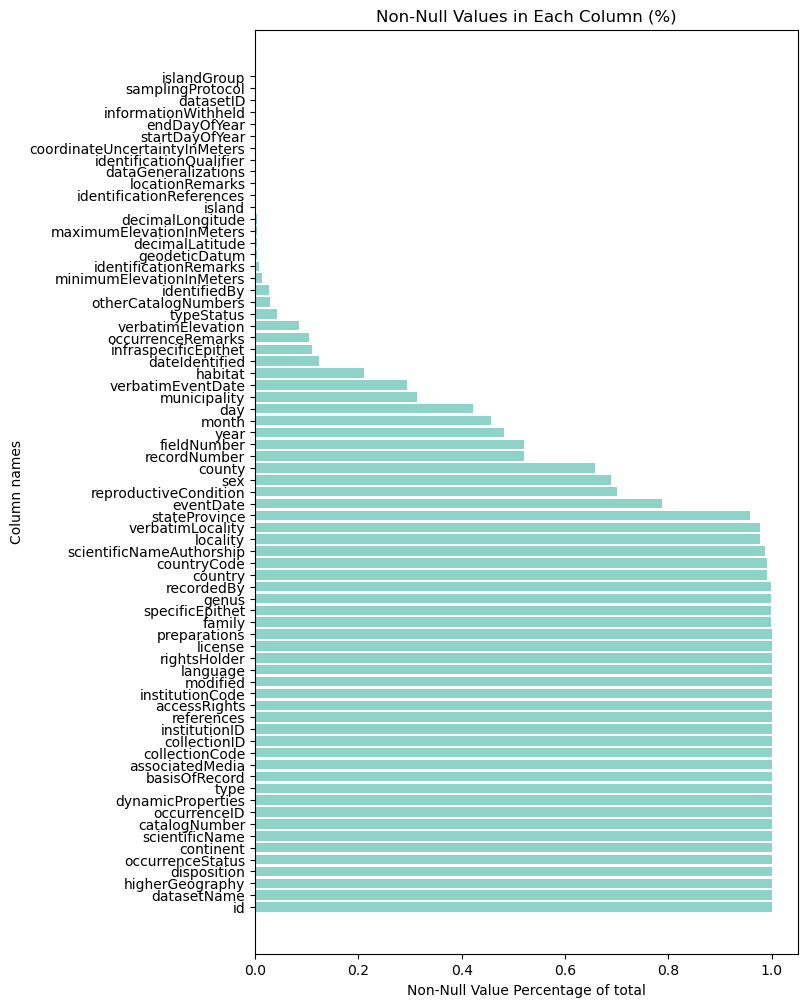

In [7]:
# Missing data overview
fig, ax = plt.subplots(1,1, figsize=(7, 12))

# crete a Series where index is column names and values are non-nan counts
non_null_counts = occurrence_df.notnull().sum().sort_values(ascending=False)
ax.barh(non_null_counts.index, non_null_counts.values/1098454)
ax.set_title('Non-Null Values in Each Column (%)')
ax.set_xlabel('Non-Null Value Percentage of total')
ax.set_ylabel('Column names')
print('Missing Data Representation:')
plt.show()

As we can see on the barchart above some of the columns appear completely empty. Let's zoom in into the top 25 columns on the plot above. We can conclude that 8 columns in the dataframe are indeed completely empty, and can be discarded from the analysis as they do not bring any additional information. These columns are: `datasetID`, `samplingProtocol`, `startDayOfYear`, `endDayofYear`, `islandGroup`, `informationWithheld`, `coordinateUncertaintyInMeters`, and `identificationQualifier`.

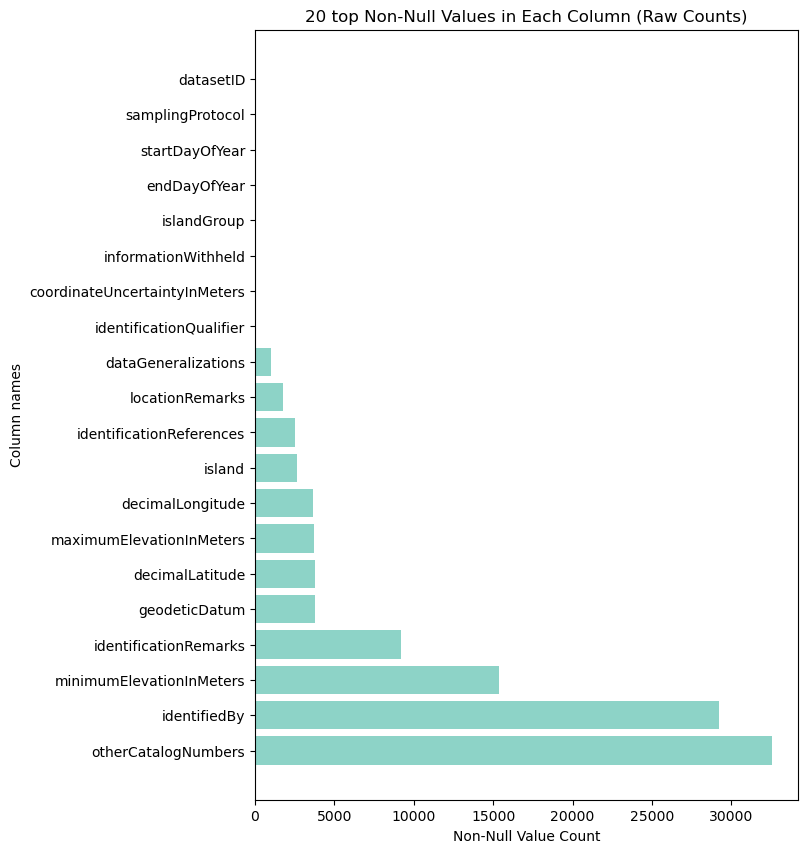

In [8]:
# Missing data overview
fig, ax = plt.subplots(1,1, figsize=(7, 10))

# crete a Series where index is column names and values are non-nan counts
non_null_counts_20 = occurrence_df.notnull().sum().nsmallest(n=20, keep='all').sort_values(ascending=False)
ax.barh(non_null_counts_20.index, non_null_counts_20.values)
ax.set_title('20 top Non-Null Values in Each Column (Raw Counts)')
ax.set_xlabel('Non-Null Value Count')
ax.set_ylabel('Column names')
plt.show()

In the data features information above we can see the corresponding type of each column. We can see some inconsistencies that might be worth addressing. For example the year, month, and date columns have type `float`. That does not make much sense, as these values are usually whole numbers. Let's convert the year, month, and date columns into integers. We have to keep in mind that there migth be some missing values (demonstared below), and we have to make a decision what should be imputed instead of those NaN's. One such solution could be to impute zeroes instead, so the year, month, and day of zero will mean that the corresponding value of the record was not recorded.

In [9]:
# Converting the type of the year, month, and day columns into ints, imputing zeroes instead of Nan-s.
occurrence_df['year'] = occurrence_df['year'].fillna(0).astype(int)
occurrence_df['month'] = occurrence_df['month'].fillna(0).astype(int)
occurrence_df['day'] = occurrence_df['day'].fillna(0).astype(int)
# Verify the datatype changes
occurrence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098454 entries, 0 to 1098453
Data columns (total 71 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   id                             1098454 non-null  object 
 1   type                           1098454 non-null  object 
 2   modified                       1098454 non-null  object 
 3   language                       1098454 non-null  object 
 4   license                        1098454 non-null  object 
 5   rightsHolder                   1098454 non-null  object 
 6   accessRights                   1098454 non-null  object 
 7   references                     1098454 non-null  object 
 8   institutionID                  1098454 non-null  object 
 9   collectionID                   1098454 non-null  object 
 10  datasetID                      0 non-null        float64
 11  institutionCode                1098454 non-null  object 
 12  collectionCode

Next step is to explore the data deeper. There are a lot of potential questions that we can try to find answers to. Below are some noteworthy findings.

Some questions that we can answer:

- What type of reproductive conditions do plants have?
- What is the most common sex in the database?
- When the exhibits were collected?
- Which countries the specimens are from?
- Who identified the most plants?

In [10]:
# What type of reproductive conditions do plants have?
occurrence_df['reproductiveCondition'].unique()

array(['Fruit', 'Flower', 'FlowerAndFruit', 'NotDetermined', 'Sterile',
       nan, 'Sporophyte'], dtype=object)

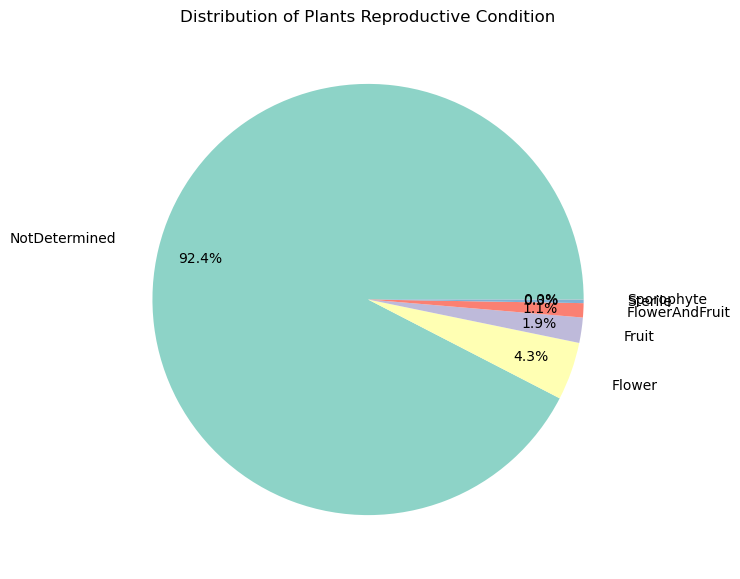

In [11]:
plt.figure(figsize=(10, 7))
plt.pie(occurrence_df['reproductiveCondition'].value_counts(), 
        labels=occurrence_df['reproductiveCondition'].value_counts().index, autopct='%1.1f%%',
         pctdistance=0.8, labeldistance=1.2)
plt.title('Distribution of Plants Reproductive Condition')
plt.show()

Let's build a pie chart of the distribution of exhibits' sex. The pie chart looks a little off - let's investigate more closely what is happening in the data.

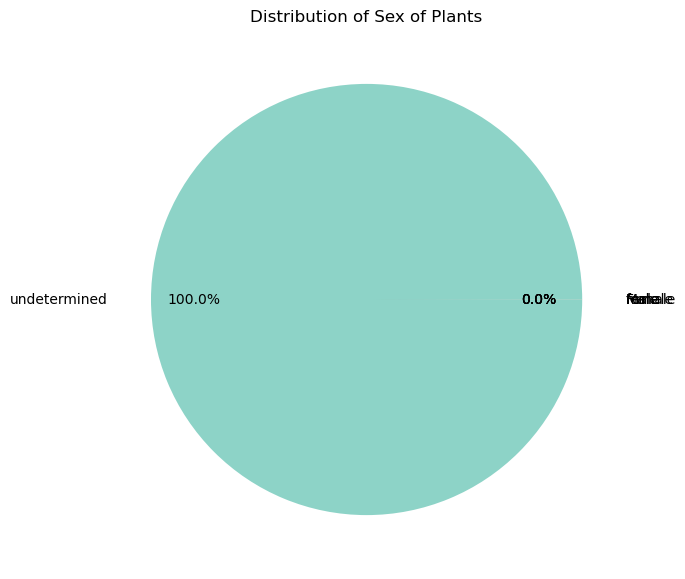

In [12]:
# What is a distribution of the plant sex?
plt.figure(figsize=(10, 7))
plt.pie(occurrence_df['sex'].value_counts(), 
        labels=occurrence_df['sex'].value_counts().index, autopct='%1.1f%%',
         pctdistance=0.8, labeldistance=1.2)
plt.title('Distribution of Sex of Plants')
plt.show()

The pie chart doesn't look very helpful. The female and male parts overlap a lot and appear to be insignifficant in comparison with the rest. Let's check what are all posible values for the `sex` column in the data and their corresponding total counts.

In [13]:
# We see an issue with this data represenation
occurrence_df['sex'].unique()

array(['undetermined', 'male', 'female', 'Female', 'Male', nan],
      dtype=object)

In [14]:
occurrence_df['sex'].value_counts()

sex
undetermined    755875
female              29
male                20
Female              17
Male                15
Name: count, dtype: int64

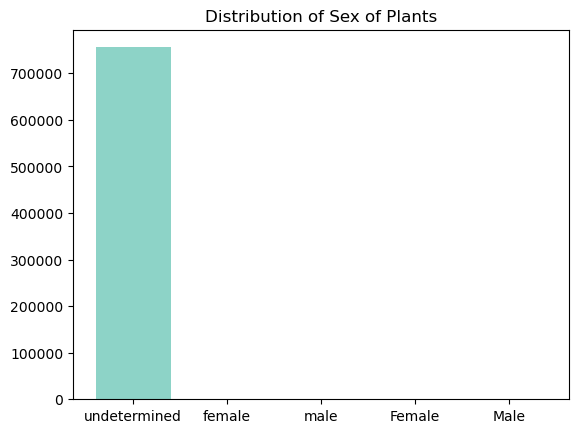

In [15]:
fig, ax = plt.subplots()
ax.bar(occurrence_df['sex'].value_counts().index, occurrence_df['sex'].value_counts())
plt.title('Distribution of Sex of Plants')
plt.show()

The issue is that some records are captured as `female`, and some as `Female`, they convey the same meaning but have different encodings. We can fix that by standardizing the naming in the `sex` column.

In [16]:
# Some data normalization is required. Let's transfer all the words in the sex column to the lower case for.
occurrence_df['sex_normalized'] = occurrence_df['sex'].str.lower()
occurrence_df['sex_normalized'].value_counts()

sex_normalized
undetermined    755875
female              46
male                35
Name: count, dtype: int64

Even after standartization, the pie chart might not be the best choice of a plot in this case. It might be better to utilize a different plot type, for example a bar chart. When having such drastic differences between the values - we often apply a log scale (base 10 by default) to one or both axis for better visualization purposes.

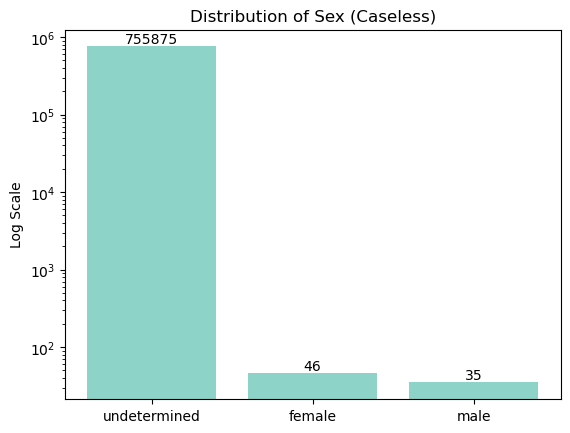

In [17]:
fig, ax = plt.subplots()
bars = ax.bar(occurrence_df['sex_normalized'].value_counts().index, occurrence_df['sex_normalized'].value_counts())
ax.bar_label(bars)
plt.title('Distribution of Sex (Caseless)')
plt.yscale("log")
plt.ylabel('Log Scale')
plt.show()

Let's explore when the exhibits were collected (which year)?

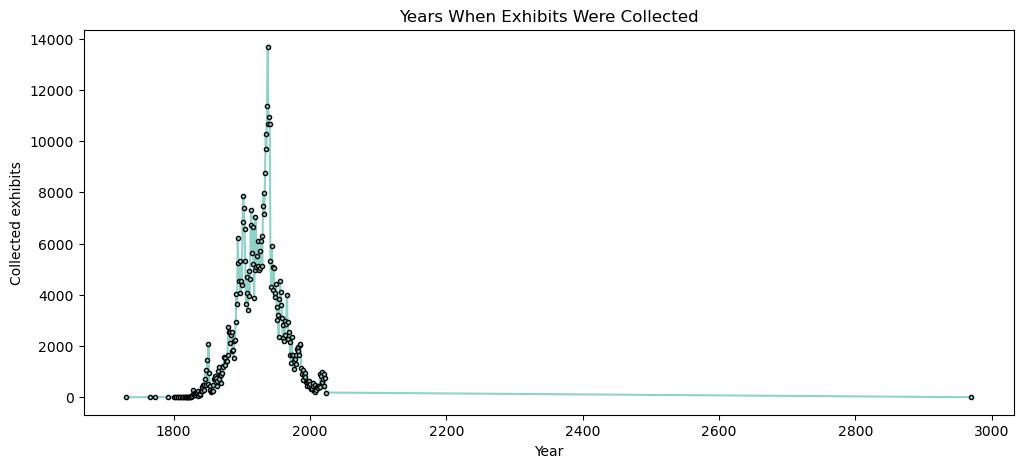

In [18]:
# The following chart looks a bit surprising...why is that???
fig, ax = plt.subplots(1,1, figsize=(12, 5))

# Make sure to not include the year of zero here! - Start from the index one.
ax.plot(occurrence_df['year'].value_counts().sort_index().index[1:], occurrence_df['year'].value_counts().sort_index()[1:].values,
        '.-', markeredgecolor = 'black')
ax.set_title('Years When Exhibits Were Collected')
ax.set_xlabel('Year')
ax.set_ylabel('Collected exhibits')
plt.show()

The plot above looks a little odd, the distribution appears to have a very long tail on the right. Let's see why it might be the case by inspecting the first and last five values of years when the specimens were collected.

In [19]:
# Let's see what are the first and last years when the plants were collected.
# The earliest 5
occurrence_df['year'].value_counts().sort_index()[1:].iloc[:5]

year
1730    1
1766    1
1773    6
1791    1
1800    4
Name: count, dtype: int64

In [20]:
# top bottom - There last value must be a mistake, unless some time travelling has occurred :D
occurrence_df['year'].value_counts().sort_index()[1:].iloc[-5:]

year
2020    923
2021    443
2022    757
2023    184
2970      1
Name: count, dtype: int64

There appears to be an unusual, most likely an erroneous, value of 2970. It is highly unlikely that one of the items was collected in the year 2970, as we are currently in 2024. Let's retrieve the record with this particular year and inspect its details.

In [21]:
# Let's find this record with year 2970
occurrence_df.loc[occurrence_df['year'] == 2970.0]

id  \
1087920  f04ac299-e606-48b4-8b62-8bbb08ecf444   

                                               type             modified  \
1087920  http://purl.org/dc/dcmitype/PhysicalObject  2023-06-09 09:42:26   

        language                            license  \
1087920       en  https://huh.harvard.edu/pages/use   

                                     rightsHolder  \
1087920  President and Fellows of Harvard College   

                                                                     accessRights  \
1087920  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   

                                                               references  \
1087920  http://data.huh.harvard.edu/f04ac299-e606-48b4-8b62-8bbb08ecf444   

                         institutionID                   collectionID  \
1087920  urn:lsid:biocol.org:col:15407  urn:lsid:biocol.org:col:15407   

         datasetID institutionCode collectionCode  \
1087920        NaN            ECON           ECON   

                                                           datasetName  \
1087920  Harvard University Herbaria: Vascular Plants of North America   

             basisOfRecord  informationWithheld dataGeneralizations  \
1087920  PreservedSpecimen                  NaN                 NaN   

                                                                                           dynamicProperties  \
1087920  {"huh_taxonomic_group": "Vascular", "huh_project_id": 12, "huh_project_name": "HerbariomiX - Dior"}   

                                 occurrenceID     catalogNumber  \
1087920  f04ac299-e606-48b4-8b62-8bbb08ecf444  barcode-00861137   

        occurrenceRemarks recordNumber     recordedBy           sex  \
1087920               NaN         2967  T. C. Plowman  undetermined   

        reproductiveCondition occurrenceStatus preparations    disposition  \
1087920         NotDetermined          present        Sheet  in collection   

        otherCatalogNumbers               associatedMedia  samplingProtocol  \
1087920                 NaN  [see Simple Media extension]               NaN   

          eventDate  startDayOfYear  endDayOfYear  year  month  day  \
1087920  2970-12-01             NaN           NaN  2970     12    1   

        verbatimEventDate habitat fieldNumber  \
1087920               NaN     NaN        2967   

                                higherGeography      continent  islandGroup  \
1087920  North America;Jamaica;Trelawny Parish;  North America          NaN   

        island  country countryCode    stateProvince county municipality  \
1087920    NaN  Jamaica          JM  Trelawny Parish    NaN          NaN   

                                                                                                       locality  \
1087920  Island View Hill, 1 mi. north of Warsop, Wilson Valley District, near summit of craggy limestone hill.   

                                                                                               verbatimLocality  \
1087920  Island View Hill, 1 mi. north of Warsop, Wilson Valley District, near summit of craggy limestone hill.   

        verbatimElevation  minimumElevationInMeters  maximumElevationInMeters  \
1087920     2000-2200 ft.                       NaN                       NaN   

        locationRemarks  decimalLatitude  decimalLongitude geodeticDatum  \
1087920             NaN              NaN               NaN           NaN   

        coordinateUncertaintyInMeters identifiedBy dateIdentified  \
1087920                           NaN          NaN            NaN   

        identificationReferences identificationRemarks  \
1087920                      NaN                   NaN   

        identificationQualifier typeStatus              scientificName  \
1087920                     NaN        NaN  Brunfelsia splendida Urban   

             family       genus specificEpithet infraspecificEpithet  \
1087920  Solanaceae  Brunfelsia       splendida                  NaN   



Using the link provided in the field `references` which leads to the description of the item on the Harvard University Herbaria website, we can see that the real collection year for this record is 1970, let's fix it in the dataframe and redo the plot.

In [22]:
# Fix the typo
occurrence_df.loc[occurrence_df['year'] == 2970, 'year'] = 1970

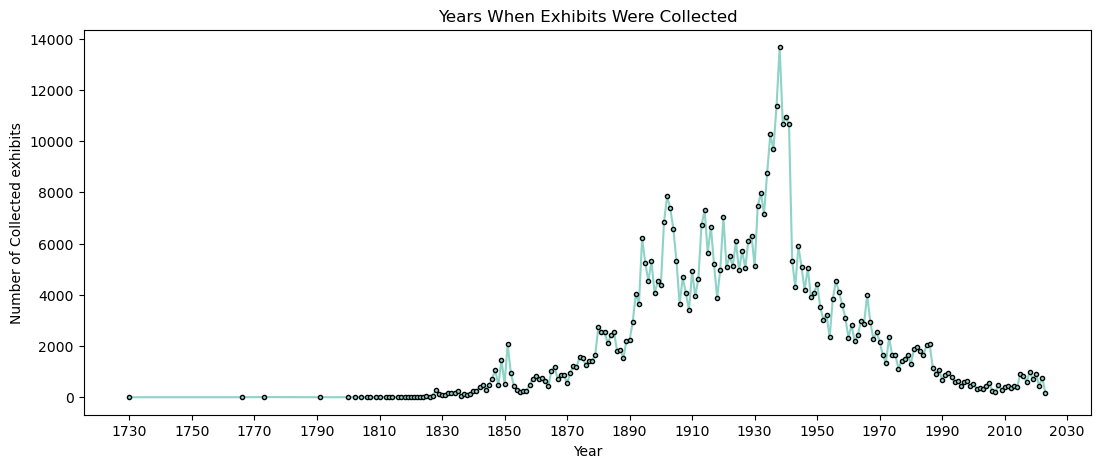

In [23]:
# Now we can fix the plot above (remove the row with the mistake)
fig, ax = plt.subplots(1,1, figsize=(13, 5))

# Do not forget that our first and most common year value is the year of zero, which is not useful for plotting
ax.plot(occurrence_df['year'].value_counts().sort_index().index[1:], occurrence_df['year'].value_counts().sort_index()[1:].values, '.-',
        markeredgecolor = 'black')
ax.set_title('Years When Exhibits Were Collected')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Collected exhibits')
ax.set_xticks(range(occurrence_df['year'].value_counts().sort_index().index[1], int(occurrence_df['year'].max()+10), 20))
plt.show()

The plot looks much more as expeted now. It appears that the most active years of specimen gathering were somewhere from 1935-1945. It looks like there was a significant overlap with the Second World War. Indeed a lot of work has been done during the Second World War by volunteers, soldiers and a famous plant explorer Richard Evans Schultes. Some details on Schultes' work can be found [here](https://www.amazonteam.org/maps/schultes/en/). (However, we have to keep in mind that approximately a half of the values of the year column are missing.)

What are some other question we can answer using the data? - We can get a list of which countries the plants were collected in.

In [24]:
# Which countries the plants were collected in?
occurrence_df['country'].value_counts()

country
United States of America            915517
Canada                              107766
Mexico                               24794
Costa Rica                            8602
Cuba                                  6529
Panama                                4348
Guatemala                             4174
Honduras                              2849
Dominican Republic                    2391
Jamaica                               2126
Haiti                                 1417
Trinidad and Tobago                   1320
Belize                                1278
El Salvador                            925
Dominica                               845
Nicaragua                              759
Bahamas                                606
Saint Lucia                            415
Saint Vincent and the Grenadines       407
Grenada                                342
Saint Kitts and Nevis                  124
Antigua and Barbuda                     88
Curaĉao                                 53
Bar

We can also get the moth distribution for the collected plants.

In [25]:
# Which months are most popular for plant collection?
occurrence_df['month'].value_counts()

month
0     596728
7     111924
6      89001
8      86691
5      64765
9      45784
4      40049
10     21609
3      18070
11      6957
2       6718
12      5237
1       4921
Name: count, dtype: int64

Getting the month data as a table of values is not very useful, a better data representation can be achieved here after some data wrangling. We have already performed the first step of data wrangling above, when we converted the month type values from floats to integers. Additionally, it will make sense to map the month values to month names before plotting, excluding the month value of zero, which means that the month value for a particular row was not recorded. After that is acomplished, the sorting by the month value can be done, since `month` is an ordinal variable.

In [26]:
# Sort by month and get rid of the missing months rows
months_ser = occurrence_df['month'].value_counts().sort_index()[1:]
months_ser

month
1       4921
2       6718
3      18070
4      40049
5      64765
6      89001
7     111924
8      86691
9      45784
10     21609
11      6957
12      5237
Name: count, dtype: int64

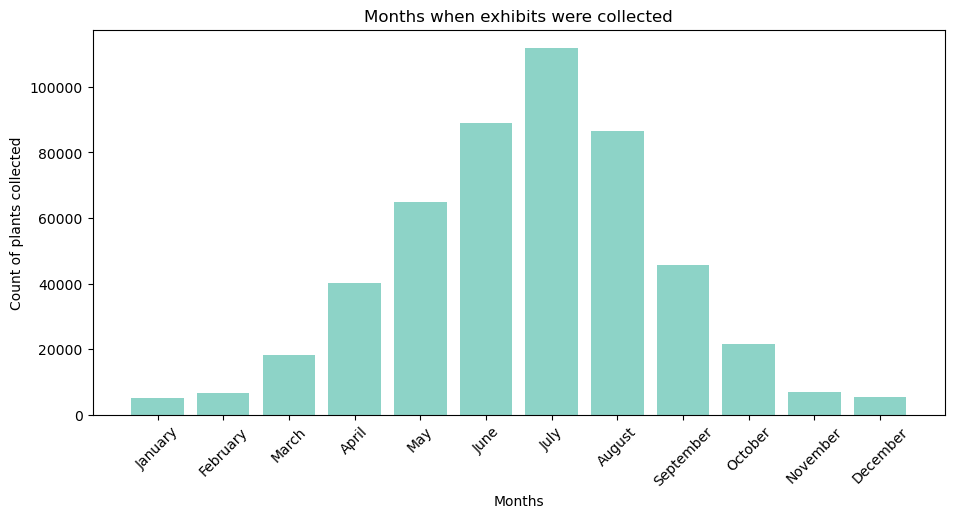

In [27]:
# The rest of the months we can plot while mapping the numbers of the months to their names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

fig, ax = plt.subplots(1,1, figsize=(11, 5))
ax.bar(months_ser.index.map(month_names), months_ser)
ax.set_xlabel('Months')
ax.set_ylabel('Count of plants collected')
ax.tick_params(axis='x', labelrotation=45)
plt.title('Months when exhibits were collected')
plt.show()

Additionally, we can explore who are the most common collectors of the plants. The answer to this question highlights the need for some data standartization in the `identifiedBy` field:

In [28]:
# Who are the most common identifiers of plants? - Top 10
# Ackerman appears to be mentioned twice
occurrence_df['identifiedBy'].value_counts()[:10]

identifiedBy
J. D. Ackerman                              953
A. A. Reznicek                              757
R. F. C. Naczi                              622
Ackerman                                    476
[annotation on sheet]                       444
W. J. Crins                                 391
Revision of Glandularia in North America    389
D. D. Dod                                   377
M. J. Waterway                              362
(TEX)                                       352
Name: count, dtype: int64

Other questions that could be asked:
- What is the most popular family, genus, etc..
- What is the rarest family...

In [29]:
# The top most common family names
occurrence_df['family'].value_counts()[:7]

family
Rosaceae        95257
Asteraceae      87249
Cyperaceae      55686
Fabaceae        54840
Orchidaceae     49707
Brassicaceae    44416
Poaceae         38633
Name: count, dtype: int64

In [30]:
# The top most common genus names
occurrence_df['genus'].value_counts()[:7]

genus
Carex          41782
Crataegus      27179
Juncus         15855
Viola          15121
Rubus          14331
Potamogeton     9702
Ranunculus      9622
Name: count, dtype: int64

One more thing to take care of before we'll move on to the identification part is to compare the variabels `locality` and `verbatimLocality`, as from the first glance it appears that the information in both columns is the same. We saw above that `locality` has one exta non-null value compared with `verbatimLocality`. Let's try to find the row where it happens, and check if the rest of the data is identical in both columns.

In [31]:
# The difference between
# 49  locality                       1073619 non-null  object 
# 50  verbatimLocality               1073618 non-null  object
# Accounting for the rows with NaN values, since Nan != Nan always
locality_diff_rows = occurrence_df[np.where(pd.isna(occurrence_df['locality']) & pd.isna(occurrence_df['verbatimLocality']), 
                                            False, occurrence_df['locality'] != occurrence_df['verbatimLocality'])]
locality_diff_rows

id  \
93834   3073b237-b83e-4c9a-969c-6c7397172766   
199343  0204cc94-cbaa-49e2-befc-603f1981b773   
792267  fcb450f4-44d2-4e79-a9f9-c029d175a035   
806837  5a7c10cb-3fed-4f7d-bd36-192da0a25539   

                                              type             modified  \
93834   http://purl.org/dc/dcmitype/PhysicalObject  2012-06-12 15:22:51   
199343  http://purl.org/dc/dcmitype/PhysicalObject  2014-12-23 12:42:57   
792267  http://purl.org/dc/dcmitype/PhysicalObject  2020-04-29 11:06:56   
806837  http://purl.org/dc/dcmitype/PhysicalObject  2020-09-03 15:38:45   

       language                            license  \
93834        en  https://huh.harvard.edu/pages/use   
199343       en  https://huh.harvard.edu/pages/use   
792267       en  https://huh.harvard.edu/pages/use   
806837       en  https://huh.harvard.edu/pages/use   

                                    rightsHolder  \
93834   President and Fellows of Harvard College   
199343  President and Fellows of Harvard College   
792267  President and Fellows of Harvard College   
806837  President and Fellows of Harvard College   

                                                                    accessRights  \
93834   https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
199343  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
792267  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   
806837  https://huh.harvard.edu/access-digital-reproductions-works-public-domain   

                                                              references  \
93834   http://data.huh.harvard.edu/3073b237-b83e-4c9a-969c-6c7397172766   
199343  http://data.huh.harvard.edu/0204cc94-cbaa-49e2-befc-603f1981b773   
792267  http://data.huh.harvard.edu/fcb450f4-44d2-4e79-a9f9-c029d175a035   
806837  http://data.huh.harvard.edu/5a7c10cb-3fed-4f7d-bd36-192da0a25539   

                        institutionID                   collectionID  \
93834   urn:lsid:biocol.org:col:15631  urn:lsid:biocol.org:col:15631   
199343  urn:lsid:biocol.org:col:15408  urn:lsid:biocol.org:col:15408   
792267  urn:lsid:biocol.org:col:15631  urn:lsid:biocol.org:col:15631   
806837  urn:lsid:biocol.org:col:15631  urn:lsid:biocol.org:col:15631   

        datasetID institutionCode collectionCode  \
93834         NaN              GH             GH   
199343        NaN            AMES           AMES   
792267        NaN              GH             GH   
806837        NaN              GH             GH   

                                                          datasetName  \
93834   Harvard University Herbaria: Vascular Plants of North America   
199343  Harvard University Herbaria: Vascular Plants of North America   
792267  Harvard University Herbaria: Vascular Plants of North America   
806837  Harvard University Herbaria: Vascular Plants of North America   

            basisOfRecord  informationWithheld dataGeneralizations  \
93834   PreservedSpecimen                  NaN                 NaN   
199343  PreservedSpecimen                  NaN                 NaN   
792267  PreservedSpecimen                  NaN                 NaN   
806837  PreservedSpecimen                  NaN                 NaN   

                                                                                                        dynamicProperties  \
93834                               {"huh_taxonomic_group": "Vascular", "huh_project_id": null, "huh_project_name": null}   
199343                              {"huh_taxonomic_group": "Vascular", "huh_project_id": null, "huh_project_name": null}   
792267  {"huh_taxonomic_group": "Vascular", "huh_project_id": 7, "huh_project_name": "US and Canada - Mass Digitization"}   
806837  {"huh_taxonomic_group": "Vascular", "huh_project_id": 7, "huh_project_name": "US and Canada - Mass Digitization"}   

                                occurrenceID     catalogNumber  \
93834   3073b237-b83e-4c9a-969c-6c7397172766  barcode-003629

Above, we can see that there are 4 rows where `locality` and `verbatimLocality` have very different values. Are those entry mistakes? It might be so, as the data in the `verbatimLocality` looks more like some sort of elevation numbers. The row with the index 792267 has `locality` value, but no `verbatimLocality` value - that is the row that we were hoping to find. As a result of this comparison, we can conclude that for the identification algorithm we can use only the `locality` variable, and not include the `verbatimLocality` to save on computational resources, as the latter doesn't add any useful information in the context of our project.

## Searching for Derogatory Words

### Search for all derogatory terms occurences

After perfoming the exploratory data analysis and getting a better understanding of the data, we can search the database for the derogatory terms. As an example a set of such terms is used, but any custom word could be used instead. Please see the Extendability section below for the details.

To minimise the computation time, it will make sense to take a subset of the original dataframe based on the nature of our task, including the following columns only: `id`, `catalogNumber`, `occurrenceRemarks`, `locality`, `decimalLatitude`, `decimalLongitude`, `year`, and `references`.

In [32]:
# take a subset of our dataframe
occurRem_loc_df = occurrence_df[['id', 'catalogNumber', 'occurrenceRemarks', 'locality', 'decimalLatitude', 'decimalLongitude', 'year', 'references']]
occurRem_loc_df.head()

id     catalogNumber  \
0  8fdfc639-39c2-4933-a1e5-77107a9a5b83  barcode-00016549   
1  a122d072-f965-485b-b34c-4374d91ab69d  barcode-00016550   
2  9d2c1fff-0b00-4388-8cb9-b7ff80c90df8  barcode-00030138   
3  4091cbbb-7cc6-4f8b-96dd-cf505d4e84b6  barcode-00106162   
4  2ae94f9f-2664-4c75-bc0c-0710b04946c6  barcode-00076403   

                                                                                                                                                                                                     occurrenceRemarks  \
0                                                                                                                                                                                                                  NaN   
1                                                                                                                                                                                                                  NaN   
2                                                                                                                                      = Maianthemum paniculatum (Mart. & Gal.) LaFrankie (det. J. V. LaFrankie, 1985)   
3                                                                                                                   [Fl. purple] | [Dates, locality, habitat and description from Wright's notes for field #s65 & 120]   
4  Protologue cites no. 5 as the type. This specimen is annotated as "Type" in Sargent's handwriting and there is no specimen in the A/GH fruit collection with the number 5. See herbarium sheet, record number 33600   

                             locality  decimalLatitude  decimalLongitude  \
0                     Nine-mile River              NaN               NaN   
1                     Nine-mile River              NaN               NaN   
2                             Orizaba              NaN               NaN   
3  N. Mex. [stony hills near El Paso]              NaN               NaN   
4                  Little Bayou Teche              NaN               NaN   

   year                                                        references  
0  1907  http://data.huh.harvard.edu/8fdfc639-39c2-4933-a1e5-77107a9a5b83  
1  1905  http://data.huh.harvard.edu/a122d072-f965-485b-b34c-4374d91ab69d  
2     0  http://data.huh.harvard.edu/9d2c1fff-0b00-4388-8cb9-b7ff80c90df8  
3  1852  http://data.huh.harvard.edu/4091cbbb-7cc6-4f8b-96dd-cf505d4e84b6  
4  1913  http://data.huh.harvard.edu/2ae94f9f-2664-4c75-bc0c-0710b04946c6

Words to search for:
- squaw
- negro
- nigger
- savage
- eskimo
- indian
- redneck (red neck)
- jap

Given the nature of our data, a derogatory term can appear either in the `occurenceRemarks` or `locality` fields.

In [33]:
occurRem_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098454 entries, 0 to 1098453
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1098454 non-null  object 
 1   catalogNumber      1098454 non-null  object 
 2   occurrenceRemarks  114227 non-null   object 
 3   locality           1073619 non-null  object 
 4   decimalLatitude    3759 non-null     float64
 5   decimalLongitude   3625 non-null     float64
 6   year               1098454 non-null  int64  
 7   references         1098454 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 67.0+ MB


The columns `occurrenceRemarks` and `locality` are object data types, which means that they contain textual data. To make the search esier, we can convert the text in those columns into the lower case.

In [34]:
# Create a copy of the dataframe subset
occurRem_loc_df_lower  = occurRem_loc_df.copy(deep=True)

# Convert two columns to lower case
occurRem_loc_df_lower['locality'] = occurRem_loc_df['locality'].astype(str).str.lower()
occurRem_loc_df_lower['occurrenceRemarks'] = occurRem_loc_df['occurrenceRemarks'].astype(str).str.lower()

# We can see that the text in those two columns is lower case now
occurRem_loc_df_lower.head()

id     catalogNumber  \
0  8fdfc639-39c2-4933-a1e5-77107a9a5b83  barcode-00016549   
1  a122d072-f965-485b-b34c-4374d91ab69d  barcode-00016550   
2  9d2c1fff-0b00-4388-8cb9-b7ff80c90df8  barcode-00030138   
3  4091cbbb-7cc6-4f8b-96dd-cf505d4e84b6  barcode-00106162   
4  2ae94f9f-2664-4c75-bc0c-0710b04946c6  barcode-00076403   

                                                                                                                                                                                                     occurrenceRemarks  \
0                                                                                                                                                                                                                  nan   
1                                                                                                                                                                                                                  nan   
2                                                                                                                                      = maianthemum paniculatum (mart. & gal.) lafrankie (det. j. v. lafrankie, 1985)   
3                                                                                                                   [fl. purple] | [dates, locality, habitat and description from wright's notes for field #s65 & 120]   
4  protologue cites no. 5 as the type. this specimen is annotated as "type" in sargent's handwriting and there is no specimen in the a/gh fruit collection with the number 5. see herbarium sheet, record number 33600   

                             locality  decimalLatitude  decimalLongitude  \
0                     nine-mile river              NaN               NaN   
1                     nine-mile river              NaN               NaN   
2                             orizaba              NaN               NaN   
3  n. mex. [stony hills near el paso]              NaN               NaN   
4                  little bayou teche              NaN               NaN   

   year                                                        references  
0  1907  http://data.huh.harvard.edu/8fdfc639-39c2-4933-a1e5-77107a9a5b83  
1  1905  http://data.huh.harvard.edu/a122d072-f965-485b-b34c-4374d91ab69d  
2     0  http://data.huh.harvard.edu/9d2c1fff-0b00-4388-8cb9-b7ff80c90df8  
3  1852  http://data.huh.harvard.edu/4091cbbb-7cc6-4f8b-96dd-cf505d4e84b6  
4  1913  http://data.huh.harvard.edu/2ae94f9f-2664-4c75-bc0c-0710b04946c6

Now let's search for the words of interest!

It is always a good idea to write code within functions for code reusability. It is especially important when we are trying to abstract our code and make it more customizable. For example, the function below could be further abstracted by providing the number of columns and the column names to the function.

In [35]:
# The function searches for the word in question in columns locality and occurrenceRemarks
# Returns a list of indexes of rows where the word in question is found, prints the number of found rows

def search_for_word(word):
    
    # search for the word in both columns; return the row index if word is found
    def search_columns(row):
        if word in row['locality'] or word in row['occurrenceRemarks']:
            return True
        return False

    # get a list of indexes; will be empty if nothing found
    found_indexes = occurRem_loc_df_lower[occurRem_loc_df_lower.apply(search_columns, axis=1)].index.tolist()

    print('Found ' + str(len(found_indexes)) + ' rows with the word "' + word +'".')
    return found_indexes

Let's use the function above with a word "eskimo".

In [36]:
eskimo_terms = search_for_word('eskimo')

Found 47 rows with the word "eskimo".


We can, of course, insepct the row indexes that we found:

In [37]:
print(eskimo_terms)

[28881, 44145, 464532, 481260, 481268, 481273, 481277, 481282, 494283, 506401, 506516, 506524, 517207, 519112, 524615, 524618, 529603, 534293, 541785, 568074, 590207, 592861, 618310, 619194, 636463, 636466, 636467, 637596, 640828, 641833, 641845, 641882, 646068, 646073, 646078, 757245, 760490, 761329, 761378, 771688, 775795, 779056, 809023, 809044, 809052, 815024, 847063]


As well as create a subset of the origianl data based on the found row indexes for the word in question and inspect all the rows in this table. Let's see if we can spot the "eskimo" words within these rows:

In [38]:
eskimo_df = occurRem_loc_df.loc[eskimo_terms]
eskimo_df

id     catalogNumber  \
28881   dd6b9977-5611-4dd3-a38d-a9cb6af98e4b  barcode-00000914   
44145   1ee0ec32-1bee-4a05-958c-8f74526caa28  barcode-00031128   
464532  e1ef76d2-4ca6-4cba-97b8-1925c83fe40d  barcode-01145307   
481260  d5e8f318-5073-4edc-92cc-09967b9d1ade  barcode-01087824   
481268  44006d56-3407-43be-a59c-b6b29e2dd332  barcode-01087830   
481273  9ed810c3-2ce4-407f-8be0-63af138dd4b6  barcode-01087834   
481277  8ca8c1c8-e04b-415c-b5b0-17262fb6d989  barcode-01087837   
481282  5f6bbac1-04f9-4162-987b-6d5c8cb07c8c  barcode-01087841   
494283  70cedc5c-3687-4c20-87e6-d0f8c242a314  barcode-01117164   
506401  fd8ec4b6-2b38-47e8-94f5-feda14a2bf9e  barcode-01536071   
506516  59f19664-b2cf-445d-8ea2-c0a5ab4ad27b  barcode-01536095   
506524  72eb1426-2117-40d7-ab40-44c42a6d33e0  barcode-01536100   
517207  f996d8d1-bc5d-4a5c-af38-bc83594b9631  barcode-01536678   
519112  d656b391-452c-4697-b3c1-e89541c27155  barcode-01536945   
524615  3e9dbfc5-a9d2-47e0-a0c9-0b21d724d2c2  barcode-01537848   
524618  ca831391-9f8f-420e-a742-2446e2724c7d  barcode-01537850   
529603  325ab621-0a3e-4b59-9d36-0ac65c8aead7  barcode-01562682   
534293  434be00c-8008-42ae-9a94-55a7c95eb1ef  barcode-01562848   
541785  94f67a7d-3441-4d25-9ad2-71c93f596a2b  barcode-01591783   
568074  a4cce6ea-253d-4128-a567-ebf1d468e4a8  barcode-01594415   
590207  dbf8bd93-5230-46ff-a910-f24969378225  barcode-01718889   
592861  ce9a015e-b97e-4ccd-af17-aded78002e98  barcode-01719758   
618310  9bc585a9-70e0-491d-a49c-71297700cfba  barcode-01712083   
619194  069461ff-be11-4e52-9b65-c70a06a237d9  barcode-01744667   
636463  98ebc402-8507-4dbf-b0e4-5620d0f4e1b9  barcode-01619746   
636466  e925b4a3-be40-442d-b234-045d177144e5  barcode-01619749   
636467  db05192b-f2ea-4b3c-bcdb-d285fa69b5f9  barcode-01619750   
637596  41b5a232-1171-4a0a-a097-8f3a5dac9d1b  barcode-01621000   
640828  9a0136ba-dadc-4466-8d1a-eeef109e60dc  barcode-01621360   
641833  baeb1e8d-cafb-43b3-9691-8cf537ca52cf  barcode-01622219   
641845  f4be67e5-592b-4184-9da9-354d0932c691  barcode-01622226   
641882  184ac189-959e-431d-9949-82fc814d182b  barcode-01622244   
646068  ea116443-1f8d-4806-8e94-7f6ad3c9fb07  barcode-01631200   
646073  db65591c-663f-4878-9de7-089742b67b94  barcode-01631203   
646078  4578e6f3-6365-416e-943f-95280309bb16  barcode-01631207   
757245  f185e158-87af-4156-9b4a-802a0100d43b  barcode-01665408   
760490  7c779e34-54c3-4ac3-b5ee-aad430438722  barcode-01836396   
761329  17d418f8-0e6b-4ec2-9312-4ea1c8491d46  barcode-02065680   
761378  70083110-affb-4768-8a20-a85cda896775  barcode-02065702   
771688  ae2b06b3-d40f-4827-a272-3d8ed237025f  barcode-01837412   
775795  a22ea559-20cf-49a2-bf77-d6029dec923f  barcode-01837896   
779056  f339f1c6-8a9b-450b-a100-f46096e7db88  barcode-01838333   
809023  7f4cd692-2f67-46b5-b1cb-0337359855cf  barcode-02029427   
809044  78868a5a-bab0-4108-93a2-91e17a17d0f1  barcode-02029430   
809052  19306e7c-c985-4699-84bb-aee4d02a8c78  barcode-02029432   
815024  0c374d34-1c58-4f93-8a6f-ae496b7751a2  barcode-01990688   
847063  23708166-a222-45c0-9b72-75dd057c9d64  barcode-02058569   

                                                                                                                                                               occurrenceRemarks  \
28881                                                                                                                                                                        NaN   
44145                                                                                                                                                                        NaN   
464532                                                                                                                                                                       NaN   
481260                                                                                 (Collected under contract with the Office of Naval Research, June 

Additionally, we can inspect each resulting record one by one with all the details about it in the HUH database:

In [39]:
# Inspect the full details of the first "eskimo" index returned
occurrence_df.iloc[28881]

id                                                                                dd6b9977-5611-4dd3-a38d-a9cb6af98e4b
type                                                                        http://purl.org/dc/dcmitype/PhysicalObject
modified                                                                                           2010-08-16 16:42:49
language                                                                                                            en
license                                                                              https://huh.harvard.edu/pages/use
rightsHolder                                                                  President and Fellows of Harvard College
accessRights                                  https://huh.harvard.edu/access-digital-reproductions-works-public-domain
references                                            http://data.huh.harvard.edu/dd6b9977-5611-4dd3-a38d-a9cb6af98e4b
institutionID                                   

We can also use this function for any word we would like to search for:

In [40]:
squaw_terms = search_for_word('squaw')

Found 147 rows with the word "squaw".


In [41]:
negro_terms = search_for_word('negro')

Found 107 rows with the word "negro".


In [42]:
nigger_terms = search_for_word('nigger')

Found 4 rows with the word "nigger".


In [43]:
savage_terms = search_for_word('savage')

Found 156 rows with the word "savage".


In [44]:
indian_terms = search_for_word('indian')

Found 1767 rows with the word "indian".


In [45]:
redneck_terms = search_for_word('redneck')

Found 0 rows with the word "redneck".


In [46]:
red_neck_terms = search_for_word('red neck')

Found 0 rows with the word "red neck".


Let's look more closely on the "jap" word search. Below we search for all the rows that contain this word, there are 118 rows that satisfy this criteria. However, after the manual inspection of some of these rows, it looks like a lot of them have words like "Japan", "japanese", "Nejapa", "Tenejapa" or "japonica", which might not be what we are interested in exactly. It means that we are getting some false positives in our results.

In [47]:
jap_terms = search_for_word('jap')

Found 118 rows with the word "jap".


In [48]:
jap_df = occurRem_loc_df.loc[jap_terms]
jap_df.head(10)

id     catalogNumber  \
2365   1bd0771b-bd95-452c-beeb-aeb8b1fff01d  barcode-00028543   
11579  5592ca68-02d0-4e30-b03b-f88f23c8fb27  barcode-00028542   
15790  7257b418-402d-4538-b41c-953451f48437  barcode-00028547   
17005  2c42691c-e165-4657-bc74-0294e853d9cf  barcode-00028546   
17584  658f098c-2a8c-40dd-b697-a1e4d9fac81c  barcode-00065397   
24088  6874a340-9914-4506-9f81-a2be2c7b8b2b  barcode-00026945   
31547  fb2b08de-30f2-4b4a-8648-99e8bd3233ea  barcode-00028544   
36139  b68a9c99-3688-4ed8-bcca-f0f4cc8ec916  barcode-00028545   
38077  4e395b68-fb46-4f46-951b-26a3f4d43181  barcode-00054212   
40588  3f55d3f6-b25f-4bc5-836b-6fff1951a20b  barcode-00013951   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 occurrenceRemarks  \
2365   [small blue label] Very much resembling S. umbraculifera but trunk more slender most with ridge when the leaves have fallen, these without fibres between the divisions. It also grows in the woods. S. umbrac. in savanas. Very young plants, leaves 3 ft older ones 10-12, full grown ones smaller Petiole of young plants slender 1/2 inch of older diam & 3-5 ft long, of older 1-2 inches & 10-15 ft long,, full grown 6-8 ft Petiole subtrigonal the lower angle rounded the upper side concave & the angle sharp Base of the leaves broad but splitting by the growth of the caudex. Full grown palm 30°-50° [feet] | [large blue label] There is a peculiarity in the ligule of this palm and the same is true of the Guano Cana. One side of the ligule extends downwards lower than the other generally if not always. In the same plant the longer side is on the same side of every leaf, it may be the right side. On aneighboring plant it may be on the left side but on the sme side of every leaf The flabelliforus palms bear as the generic name of Guano or sometimes the diminuative Guanito. On the contrary the pinnatifrond are called palma thus Palma real (Oreodoxa) Palma maca (Geonoma) Palma oriolla (Oreodoxa) Palma barrigona &c. Guano cana Guano Japa Guano prieto Guana blanco Some bear special names Coco macada (Bactris) Corojo (Acronemia) Yavey &c. In some cases the specific name appears as a prefix as Yaraguana Miraguana &c.   
11579  [small blue label] Very much resembling S. umbraculifera but trunk more slender most with ridge when the leaves have fallen, these without fibres between the divisions. It also grows in the woods. S. umbrac. in savanas. Very young plants, leaves 3 ft older ones 10-12, full grown ones smaller Petiole of young plants slender 1/2 inch of older diam & 3-5 ft long, of older 1-2 inches & 10-15 ft long,, full grown 6-8 ft Petiole subtrigonal the lower angle rou

We can avoid the behavior above by adding an extra functionality to the function `search_for_word`. It should be possible to indicate if we would like to match the word in question as a substring (as it is now) or as an exact match. It can be done by introducing an extra argument `exact_match` which can be True or False to the algoritm. The refined function will be as follows:

In [49]:
# Added exact match functionality, which is False by default?

def search_for_word(word, exact_match=False):

    # matching word substrings, like before (the default behavior when the "exact_match" argument is not provided)
    if exact_match == False:
        # search for the word in both columns; return the row index if word is found
        def search_columns(row):
            if word in row['locality'] or word in row['occurrenceRemarks']:
                return True
            return False

        # get a list of indexes; will be empty if nothing found
        found_indexes = occurRem_loc_df_lower[occurRem_loc_df_lower.apply(search_columns, axis=1)].index.tolist()

    # matching the word exactly, when the "exact_match" argument is True
    else:
        # search for the word in both columns; return the row index if word is found
        def search_columns(row):
            # using regular expressions, '\b' matches word boundaries
            pattern = rf'\b{re.escape(word)}\b'
            
            if re.search(pattern, row['locality']) or re.search(pattern, row['occurrenceRemarks']):
                return True
            return False

        # get a list of indexes; will be empty if nothing found
        found_indexes = occurRem_loc_df_lower[occurRem_loc_df_lower.apply(search_columns, axis=1)].index.tolist()
        

    print('Found ' + str(len(found_indexes)) + ' rows with the word "' + word +'".')
    return found_indexes

The function accepts two parameters now: 
- `word`- a term to search for
- `exact_match` - a parameter that controls which type of search should be performed, an exact match (the parameter value of `True`) or a substring search (the default parameter value of `False`). Since the second parameter has a default value, a user does not have to specify it at all if they are interested in the substring search, and only if a user wants to perform an exact match, they will have to provide the agrument with the value `True` to the function.

In [50]:
# If we call the search_for_word fucntion with only one argument - it will match a substring of the provided word (like before). 
jap_terms = search_for_word('jap')

Found 118 rows with the word "jap".


In [51]:
# As the exact_match parameter is false by default.
# But if we provide the second argument, which is a Boolean value 'True', the function will match the exact word only.
jap_terms = search_for_word('jap', True)

Found 5 rows with the word "jap".


We can see that the result between those two search approaches can be drastically different, in the case of the term "indian" it is 118 found rows vs 5! However, it should be noted that both approaches might be useful, depending on the goals of the researcher, that is why it is better to keep the functionality for both of them in the fucntion.

Based on the two search approaches we can create a table for all the terms used and compare the resulting numbers:

In [52]:
# Make a table of the results

derog_words = ['squaw','negro', 'nigger', 'savage', 'eskimo', 'indian', 'redneck', 'jap']
value_counts_all = [len(search_for_word('squaw')), len(search_for_word('negro')), len(search_for_word('nigger')),
               len(search_for_word('savage')), len(search_for_word('eskimo')), len(search_for_word('indian')),
               len(search_for_word('redneck')), len(search_for_word('jap'))]
value_counts_exact = [len(search_for_word('squaw', exact_match=True)), len(search_for_word('negro', exact_match=True)), 
                      len(search_for_word('nigger', exact_match=True)), len(search_for_word('savage', exact_match=True)), 
                      len(search_for_word('eskimo', exact_match=True)), len(search_for_word('indian', exact_match=True)),
                      len(search_for_word('redneck', exact_match=True)), len(search_for_word('jap', exact_match=True))]

Found 147 rows with the word "squaw".
Found 107 rows with the word "negro".
Found 4 rows with the word "nigger".
Found 156 rows with the word "savage".
Found 47 rows with the word "eskimo".
Found 1767 rows with the word "indian".
Found 0 rows with the word "redneck".
Found 118 rows with the word "jap".
Found 146 rows with the word "squaw".
Found 77 rows with the word "negro".
Found 3 rows with the word "nigger".
Found 153 rows with the word "savage".
Found 47 rows with the word "eskimo".
Found 1549 rows with the word "indian".
Found 0 rows with the word "redneck".
Found 5 rows with the word "jap".


In [53]:
total_counts = pd.DataFrame({'Derogatory Term': derog_words,
                            'Total Count': value_counts_all,
                            'Exact Match Count': value_counts_exact}).set_index('Derogatory Term')
print('Total counts of derogatory terms in the HUH database for North America, sorted in descending order:')
display(total_counts.sort_values(by=['Total Count'], ascending=False))

Total counts of derogatory terms in the HUH database for North America, sorted in descending order:


Total Count  Exact Match Count
Derogatory Term                                
indian                  1767               1549
savage                   156                153
squaw                    147                146
jap                      118                  5
negro                    107                 77
eskimo                    47                 47
nigger                     4                  3
redneck                    0                  0

Additionally, we can manually inspect the received lists of indexes to see if they have been identified already (like in the cell below), however it would be better to do it programmatically. The deragotary term below has already been identified in the database, as it has the "Verbatim transcription of historical term" tag.
It would not make much sense to inspect each and every found record manually, let's automate it!

### Filter the terms that have already been identified

It would be useful to isolate the terms that have been already tagged as derogatory in the database and try to find the ones that are not tagged yet. In order to do so we can introduce an updated version of the fucntion with an extra parameter called `tag`, which will accept a word (string) or phrase., i.e. a couple of words separated by a blank space, which are used as a label for identified terms in a database. In our case we can use "historical" or "historical term" as such tag.
To adhere to principles of modularity, the updated code is wrapped into a function called `search_by_word_and_tag` which accepts three parameters: `word`, `tag`, and `exact_match`, from those the last parameter is optional.

In [54]:
# Now we are searching for these words, but do account for "historical" term in the locality column

In [55]:
# The function returns the terms that do not have a specific tag in the locality or occurrenceRemarks columns
# Return the list of the row indexes and the dataframe based on those values
def search_by_word_and_tag(word, tag, exact_match=False):

    if exact_match == False:
    
        # for the found rows if the locality column has the word "historical"
        # search for the word in both columns; return the row index if word is found
        def search_word(row):
            if word in row['locality'] or word in row['occurrenceRemarks']:
                return True
            return False

        # get a list of indexes; will be empty if nothing found
        indexes = occurRem_loc_df_lower[occurRem_loc_df_lower.apply(search_word, axis=1)].index.tolist()

        # subset the dataframe on the found indexes
        found_df = occurrence_df.loc[indexes]

        # from the data subset exclude the rows that have been tagged
        def search_tag(row):
            # check for NaN values in occurenceRemarks:
            #if pd.isna(df.iloc[1,0])
            if isinstance(row['locality'], str) and tag in row['locality']:
                return False
            if isinstance(row['occurrenceRemarks'], str) and tag in row['occurrenceRemarks']:
                return False
            return True

    # if exact_match is True
    else:

        # for the found rows if the locality column has the word "historical"
        # search for the word in both columns; return the row index if word is found
        def search_word(row):

            # using regular expressions, '\b' matches word boundaries
            pattern = rf'\b{re.escape(word)}\b'
            
            if re.search(pattern, row['locality']) or re.search(pattern, row['occurrenceRemarks']):
                return True
            return False
            

        # get a list of indexes; will be empty if nothing found
        indexes = occurRem_loc_df_lower[occurRem_loc_df_lower.apply(search_word, axis=1)].index.tolist()

        # subset the dataframe on the found indexes
        found_df = occurrence_df.loc[indexes]

        # from the data subset exclude the rows that have been tagged
        def search_tag(row):
            # check for NaN values in occurenceRemarks:
            #if pd.isna(df.iloc[1,0])
            if isinstance(row['locality'], str) and tag in row['locality']:
                return False
            if isinstance(row['occurrenceRemarks'], str) and tag in row['occurrenceRemarks']:
                return False
            return True

    # get a list of indexes; will be empty if nothing found
    not_identified_indexes = found_df[found_df.apply(search_tag, axis=1)].index.tolist()
    print('Found ' + str(len(not_identified_indexes)) + ' not tagged rows with the word "' + word +'".')
    not_identified_df = occurRem_loc_df.loc[not_identified_indexes]
    return [not_identified_indexes, not_identified_df]

In [56]:
eskimo_untagged, eskimo_untagged_df = search_by_word_and_tag(word="eskimo", tag="historical")

Found 39 not tagged rows with the word "eskimo".


In [57]:
eskimo_untagged_df

id     catalogNumber  \
28881   dd6b9977-5611-4dd3-a38d-a9cb6af98e4b  barcode-00000914   
44145   1ee0ec32-1bee-4a05-958c-8f74526caa28  barcode-00031128   
464532  e1ef76d2-4ca6-4cba-97b8-1925c83fe40d  barcode-01145307   
481260  d5e8f318-5073-4edc-92cc-09967b9d1ade  barcode-01087824   
481268  44006d56-3407-43be-a59c-b6b29e2dd332  barcode-01087830   
481273  9ed810c3-2ce4-407f-8be0-63af138dd4b6  barcode-01087834   
481277  8ca8c1c8-e04b-415c-b5b0-17262fb6d989  barcode-01087837   
481282  5f6bbac1-04f9-4162-987b-6d5c8cb07c8c  barcode-01087841   
494283  70cedc5c-3687-4c20-87e6-d0f8c242a314  barcode-01117164   
506401  fd8ec4b6-2b38-47e8-94f5-feda14a2bf9e  barcode-01536071   
506516  59f19664-b2cf-445d-8ea2-c0a5ab4ad27b  barcode-01536095   
506524  72eb1426-2117-40d7-ab40-44c42a6d33e0  barcode-01536100   
517207  f996d8d1-bc5d-4a5c-af38-bc83594b9631  barcode-01536678   
519112  d656b391-452c-4697-b3c1-e89541c27155  barcode-01536945   
524618  ca831391-9f8f-420e-a742-2446e2724c7d  barcode-01537850   
529603  325ab621-0a3e-4b59-9d36-0ac65c8aead7  barcode-01562682   
534293  434be00c-8008-42ae-9a94-55a7c95eb1ef  barcode-01562848   
541785  94f67a7d-3441-4d25-9ad2-71c93f596a2b  barcode-01591783   
568074  a4cce6ea-253d-4128-a567-ebf1d468e4a8  barcode-01594415   
592861  ce9a015e-b97e-4ccd-af17-aded78002e98  barcode-01719758   
618310  9bc585a9-70e0-491d-a49c-71297700cfba  barcode-01712083   
619194  069461ff-be11-4e52-9b65-c70a06a237d9  barcode-01744667   
640828  9a0136ba-dadc-4466-8d1a-eeef109e60dc  barcode-01621360   
641833  baeb1e8d-cafb-43b3-9691-8cf537ca52cf  barcode-01622219   
641882  184ac189-959e-431d-9949-82fc814d182b  barcode-01622244   
646068  ea116443-1f8d-4806-8e94-7f6ad3c9fb07  barcode-01631200   
646073  db65591c-663f-4878-9de7-089742b67b94  barcode-01631203   
646078  4578e6f3-6365-416e-943f-95280309bb16  barcode-01631207   
757245  f185e158-87af-4156-9b4a-802a0100d43b  barcode-01665408   
760490  7c779e34-54c3-4ac3-b5ee-aad430438722  barcode-01836396   
761329  17d418f8-0e6b-4ec2-9312-4ea1c8491d46  barcode-02065680   
761378  70083110-affb-4768-8a20-a85cda896775  barcode-02065702   
771688  ae2b06b3-d40f-4827-a272-3d8ed237025f  barcode-01837412   
775795  a22ea559-20cf-49a2-bf77-d6029dec923f  barcode-01837896   
779056  f339f1c6-8a9b-450b-a100-f46096e7db88  barcode-01838333   
809023  7f4cd692-2f67-46b5-b1cb-0337359855cf  barcode-02029427   
809044  78868a5a-bab0-4108-93a2-91e17a17d0f1  barcode-02029430   
809052  19306e7c-c985-4699-84bb-aee4d02a8c78  barcode-02029432   
847063  23708166-a222-45c0-9b72-75dd057c9d64  barcode-02058569   

                                                                                                                                                               occurrenceRemarks  \
28881                                                                                                                                                                        NaN   
44145                                                                                                                                                                        NaN   
464532                                                                                                                                                                       NaN   
481260                                                                                 (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
481268                                                                                 (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
481273                                                                                                                                                                       NaN   
481277                                                                                 (Collected under contract with the Office of Naval Res

It would be nice to see which rows were included in the all occurences of the deragotory term list of indexes, but not included in the untagged list of indexes. Let's compare those two lists and see which rows were already tagged in the database. Of course, it would be nice to have a function for that, so we can work with any two lists.

In [58]:
# Returns the list of the raws that are already tagged in the database
def compare_lists(list1, list2):
    # Convert the lists to sets, it's safe since our indexes must be unique
    all_set = set(list1)
    untagged_set = set(list2)

    # Find elements that are not in both lists
    unique_elements = all_set.symmetric_difference(untagged_set)

    return list(unique_elements)

In [59]:
# Theresult is a list of indexes with rows with term "eskimo" which are already identified in the database.
eskimo_tagged = compare_lists(eskimo_terms, eskimo_untagged)
eskimo_tagged

[637596, 636463, 815024, 636466, 636467, 641845, 524615, 590207]

In [60]:
# Let's look at the tagged eskimo rows in the database
occurRem_loc_df.loc[eskimo_tagged]

id     catalogNumber  \
637596  41b5a232-1171-4a0a-a097-8f3a5dac9d1b  barcode-01621000   
636463  98ebc402-8507-4dbf-b0e4-5620d0f4e1b9  barcode-01619746   
815024  0c374d34-1c58-4f93-8a6f-ae496b7751a2  barcode-01990688   
636466  e925b4a3-be40-442d-b234-045d177144e5  barcode-01619749   
636467  db05192b-f2ea-4b3c-bcdb-d285fa69b5f9  barcode-01619750   
641845  f4be67e5-592b-4184-9da9-354d0932c691  barcode-01622226   
524615  3e9dbfc5-a9d2-47e0-a0c9-0b21d724d2c2  barcode-01537848   
590207  dbf8bd93-5230-46ff-a910-f24969378225  barcode-01718889   

                                                                                                                      occurrenceRemarks  \
637596                                        (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
636463                                        (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
815024                                                                                                                              NaN   
636466                                        (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
636467            Next year's buds on plants. (Collected under contract with the Office of Naval Research, June 17-September 16, 1950).   
641845  Densely matted; flowers fragrant. | (Collected under contract with the Office of Naval Research, June 17 - September 16, 1950).   
524615                                                                                                                              NaN   
590207                                                                                                                              NaN   

                                                                                                                                       locality  \
637596        Site of old Eskimo village of Nuwuk, end of Point Barrow sand spit [Verbatim transcription of historical term] [See map on label]   
636463                  site of old Eskimo village of Nuwuk, tip of Point Barrow [See map on label] [Verbatim transcription of historical term]   
815024                                                                  Eskimo Island. Long 63° 37' [Verbatim transcription of historical term]   
636466  site of old Eskimo Village of Nuwuk, at northernmost tip of Point Barrow [See map on label] [Verbatim transcription of historical term]   
636467    Site of old Eskimo village of Nuwuk, at tip of Point Barrow sand spit. [See map on label] [Verbatim transcription of historical term]   
641845  site of abandoned Eskimo village of Nuwuk [Verbatim transcription of historical term.], end of Pt. Bar-row sand spit [See map on label]   
524615                                               Ile au Marteau (Eskimo Island), Mingan Islands [Verbatim transcription of historical term]   
590207                                       S. shore of Lake Melville, [Ont.], near Eskimo [Paps.] [Verbatim transcription of historical term]   

        decimalLatitude  decimalLongitude  year  \
637596              NaN               NaN  1950   
636463              NaN               NaN  1950   
815024              NaN               NaN  1929   
636466              NaN               NaN  1950   
636467              NaN               NaN  1950   
641845              NaN               NaN  1950   
524615              NaN               NaN  1915   
590207              NaN               NaN  1921   

                                                              references  
637596  http://data.huh.harvard.edu/41b5a232-1171-4a0a-a097-8f3a5dac9d1b  
636463  http://data.huh.harvard.edu/98ebc402-8507-4dbf-b0e4-5620d0f4e1b9  
815024  http://data.huh.harvard.edu/0c374d34-1c58-4f93-8a6f-ae496b7751a2  
636466  http://data.huh.harvard.edu/e925b4a3-be40-442d-b234-045d177144e5  
636467  http://data.huh.harvard.edu/

In [61]:
# We can perform the same action for any word we would like to:

In [62]:
squaw_untagged, squaw_untagged_df = search_by_word_and_tag(word="squaw", tag="historical")

Found 146 not tagged rows with the word "squaw".


In [63]:
# Display the top 5 rows only
squaw_untagged_df.head()

id     catalogNumber  \
2964   8c5ddc15-6434-456a-9a46-8a84e137074a  barcode-00218911   
11353  7544d34f-6e59-41e7-b2da-275b5ac02695  barcode-00216098   
16226  f4cb4a9d-8482-4ac5-9371-684deca4d318  barcode-00216183   
16465  3c0e4139-0738-4bb2-9bf7-c9df13d16098  barcode-00216184   
19231  94ce2c66-5a19-45fa-9a48-63d470b36f80  barcode-00036698   

           occurrenceRemarks  \
2964                  Common   
11353                    NaN   
16226  Along mountain stream   
16465  Along mountain stream   
19231                    NaN   

                                                  locality  decimalLatitude  \
2964             T10 R4, WELS, margins of Squaw Pan Stream              NaN   
11353       Along North Squaw Brook, Kennebec River Valley              NaN   
16226  Region of Moosehead Lake, Squaw Mountain, 3000 feet              NaN   
16465  Region of Moosehead Lake, Squaw Mountain, 3000 feet              NaN   
19231                          Squaw Butte, alt. 3500 feet              NaN   

       decimalLongitude  year  \
2964                NaN  1897   
11353               NaN  1895   
16226               NaN  1895   
16465               NaN  1895   
19231               NaN  1911   

                                                             references  
2964   http://data.huh.harvard.edu/8c5ddc15-6434-456a-9a46-8a84e137074a  
11353  http://data.huh.harvard.edu/7544d34f-6e59-41e7-b2da-275b5ac02695  
16226  http://data.huh.harvard.edu/f4cb4a9d-8482-4ac5-9371-684deca4d318  
16465  http://data.huh.harvard.edu/3c0e4139-0738-4bb2-9bf7-c9df13d16098  
19231  http://data.huh.harvard.edu/94ce2c66-5a19-45fa-9a48-63d470b36f80

In [64]:
# Check the difference between tagged and untagged values
squaw_tagged = compare_lists(squaw_terms, squaw_untagged)
squaw_tagged

[777798]

In [65]:
# In the case of term "squaw" it looks like only 1 row from 147 was already tagged.
occurRem_loc_df.loc[squaw_tagged]

id     catalogNumber  \
777798  999b42fd-61e2-461e-abf0-c15eb3240dda  barcode-02044384   

        occurrenceRemarks  \
777798  Many large bushes   

                                                                                                     locality  \
777798  Squaw Canyon [Verbatim transcription of historical term] road from Gerlach to Eagleville (California)   

        decimalLatitude  decimalLongitude  year  \
777798              NaN               NaN  1946   

                                                              references  
777798  http://data.huh.harvard.edu/999b42fd-61e2-461e-abf0-c15eb3240dda

Let's aggregate our results so far in one table:

In [67]:
# Make a table of the results
unident_counts_all = [len(search_by_word_and_tag(word='squaw', tag='historical')[0]), 
                      len(search_by_word_and_tag(word="negro", tag="historical")[0]), 
                      len(search_by_word_and_tag(word='nigger', tag='historical')[0]), 
                      len(search_by_word_and_tag(word='savage', tag='historical')[0]),
                      len(search_by_word_and_tag(word='eskimo', tag='historical')[0]), 
                      len(search_by_word_and_tag(word='indian', tag='historical')[0]),
                      len(search_by_word_and_tag(word='redneck', tag='historical')[0]), 
                      len(search_by_word_and_tag(word='jap', tag='historical')[0])]

unident_counts_exact = [len(search_by_word_and_tag(word='squaw', tag='historical', exact_match=True)[0]), 
                        len(search_by_word_and_tag(word='negro', tag='historical', exact_match=True)[0]), 
                        len(search_by_word_and_tag(word='nigger', tag='historical', exact_match=True)[0]),
                        len(search_by_word_and_tag(word='savage', tag='historical', exact_match=True)[0]),
                        len(search_by_word_and_tag(word='eskimo', tag='historical', exact_match=True)[0]),
                        len(search_by_word_and_tag(word='indian', tag='historical', exact_match=True)[0]),
                        len(search_by_word_and_tag(word='redneck', tag='historical', exact_match=True)[0]), 
                        len(search_by_word_and_tag(word='jap', tag='historical', exact_match=True)[0])]

Found 146 not tagged rows with the word "squaw".
Found 106 not tagged rows with the word "negro".
Found 2 not tagged rows with the word "nigger".
Found 132 not tagged rows with the word "savage".
Found 39 not tagged rows with the word "eskimo".
Found 1738 not tagged rows with the word "indian".
Found 0 not tagged rows with the word "redneck".
Found 118 not tagged rows with the word "jap".
Found 145 not tagged rows with the word "squaw".
Found 76 not tagged rows with the word "negro".
Found 2 not tagged rows with the word "nigger".
Found 129 not tagged rows with the word "savage".
Found 39 not tagged rows with the word "eskimo".
Found 1524 not tagged rows with the word "indian".
Found 0 not tagged rows with the word "redneck".
Found 5 not tagged rows with the word "jap".


In [68]:
# Update the table with the counts of the unidentified terms
not_found_counts = pd.DataFrame({'Derogatory Term': derog_words, 'Total Count': value_counts_all, 
                                 'Unidentified Total Count': unident_counts_all, 'Exact Match Count': value_counts_exact, 
                                 'Unidentified Exact Match Count': unident_counts_exact}).set_index('Derogatory Term')
print('Total and unidentified counts of derogatory terms in the HUH database for North America, sorted in descending order:')
display(not_found_counts.sort_values(by=['Total Count'], ascending=False))

Total and unidentified counts of derogatory terms in the HUH database for North America, sorted in descending order:


Total Count  Unidentified Total Count  Exact Match Count  \
Derogatory Term                                                             
indian                  1767                      1738               1549   
savage                   156                       132                153   
squaw                    147                       146                146   
jap                      118                       118                  5   
negro                    107                       106                 77   
eskimo                    47                        39                 47   
nigger                     4                         2                  3   
redneck                    0                         0                  0   

                 Unidentified Exact Match Count  
Derogatory Term                                  
indian                                     1524  
savage                                      129  
squaw                                       145  
jap                                           5  
negro                                        76  
eskimo                                       39  
nigger                                        2  
redneck                                       0

## Geospatial Data Visualization

An important part of working with any data is data visualization. Since in the database we are working with there are columns `decimalLatitude` and `decimalLongitude` we can plot the corresponding records on a map. 

In [69]:
# Import plotting libraries
import folium
from folium import plugins
import ipywidgets

In [70]:
# Check the entire dataframe - have to make sure that both latitude and logitude have a value
occurRem_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098454 entries, 0 to 1098453
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1098454 non-null  object 
 1   catalogNumber      1098454 non-null  object 
 2   occurrenceRemarks  114227 non-null   object 
 3   locality           1073619 non-null  object 
 4   decimalLatitude    3759 non-null     float64
 5   decimalLongitude   3625 non-null     float64
 6   year               1098454 non-null  int64  
 7   references         1098454 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 67.0+ MB


After a closer inspection of the details of our data, it is noticeable that only about 3% of the records have non-zero value in the columns `decimalLatitude` and `decimalLongitude`. And when we narrow it down to one term, let's say `indian`, there is a very small number of data points that we can plot. In this case it's only 18 records with the term "indian" that have geographical coordinates data present.

In [71]:
# Problem with plotting - almost no values per term
indian_all_df = occurRem_loc_df.loc[indian_terms]
indian_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, 749 to 1098379
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1767 non-null   object 
 1   catalogNumber      1767 non-null   object 
 2   occurrenceRemarks  469 non-null    object 
 3   locality           1763 non-null   object 
 4   decimalLatitude    18 non-null     float64
 5   decimalLongitude   18 non-null     float64
 6   year               1767 non-null   int64  
 7   references         1767 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 124.2+ KB


In [72]:
indian_untagged, indian_untagged_df = search_by_word_and_tag(word="indian", tag="historical")

Found 1738 not tagged rows with the word "indian".


In [73]:
indian_tagged = compare_lists(indian_terms, indian_untagged)
print(len(indian_tagged))
print(indian_tagged)

29
[807029, 565398, 934192, 918113, 1090280, 803881, 459965, 459980, 644328, 533759, 591217, 959940, 951781, 456303, 972439, 771908, 989360, 944637, 719518, 572165, 1051453, 1076135, 961469, 461911, 458019, 1019336, 798414, 929502, 802578]


In [74]:
# Plotting indian terms as they have the most rows to plot (18)
# At first have to sort out the Nan value rows:
indian_coords_df = indian_all_df.dropna(subset=['decimalLatitude', 'decimalLongitude'])
indian_coords_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 49922 to 1094015
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18 non-null     object 
 1   catalogNumber      18 non-null     object 
 2   occurrenceRemarks  9 non-null      object 
 3   locality           18 non-null     object 
 4   decimalLatitude    18 non-null     float64
 5   decimalLongitude   18 non-null     float64
 6   year               18 non-null     int64  
 7   references         18 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ KB


In [75]:
# None of the rows with only tagged terms "indian" have coordinate data
indian_tagged_df = occurRem_loc_df.loc[indian_tagged]
indian_tagged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 807029 to 802578
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29 non-null     object 
 1   catalogNumber      29 non-null     object 
 2   occurrenceRemarks  6 non-null      object 
 3   locality           29 non-null     object 
 4   decimalLatitude    0 non-null      float64
 5   decimalLongitude   0 non-null      float64
 6   year               29 non-null     int64  
 7   references         29 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ KB


In [76]:
# Add counts to the df
indian_coords_df['count'] = range(1, len(indian_coords_df) + 1)
indian_coords_df

/var/folders/n0/083xr8qj09z80p41r86z1xkc0000gn/T/ipykernel_54298/1776393710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_coords_df['count'] = range(1, len(indian_coords_df) + 1)


id     catalogNumber  \
49922    d70f3bdc-3583-42d6-a727-2e3673fd0232  barcode-00229928   
63443    49b89ae2-d119-403f-8a25-43b502af83f4  barcode-00257563   
73036    3c0f40f5-8146-45d4-b299-2da945fb7836  barcode-00351855   
120443   df149181-e8c8-492b-9b48-73c88e0963a0  barcode-00403036   
199155   dce09c9e-76db-4103-8d2c-7dcbf9df7628  barcode-00404291   
199159   c0bcc42d-6fba-4c24-9b77-3ca5032a47f1  barcode-00404294   
447750   c825b2dc-5897-4237-b49f-12274a5c789c  barcode-01056511   
451197   741d2f72-63a7-4db1-a385-2c37b37877a8  barcode-00395180   
639198   9d5baae7-d31f-44e9-863a-f90ad4aaa879  barcode-00979177   
688286   57e7b5a7-6147-45a3-8765-ec69ce93b471  barcode-00934888   
730782   f5ea5183-410a-4e92-a1dd-99b6250344de  barcode-01984341   
745584   69d473a5-c290-4fb4-a316-701a49763491  barcode-01979541   
761226   dd1c5a56-3d33-42ec-ba55-f0130fd0beeb  barcode-02065602   
783823   f48de132-772d-4f08-874d-85da3b055ff2  barcode-02046575   
913571   e5426394-61f9-463e-9508-2fef799bd4e9  barcode-02168901   
913756   18295237-7651-4a02-8a24-47caf43b461c  barcode-02168900   
1093527  8ffe1451-d4b8-43e9-8a0b-1f771cbdb467  barcode-02620978   
1094015  c3bc8bda-932c-4aa3-a0c2-bd311caef259  barcode-02288517   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        occurrenceRemarks  \
49922                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Terrestrial, internodes short to 2.5 cm. diameter, dark green and glossy, petioles dark green, terete, glossy below, subcoriaceous, semiglossy, bicolorous   
63443                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            The largest of 2 specimens seen here measured 3.75 m tall and 6 cm dia. | T 63N R 6E SE1/4 of SW1/4 of Sec 4 | Minnesota Department of Natural Resources   
73036                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 NaN   
120443                                                                                       

Even if there is a very limited number of non-empty latitude and longitude values, the visualization still helps us to find something interetsting. Looks like the record 15 and 16 (a temporary assigned numbers) must have excatly the same coordinates, but a little typo (missing a minus, as a result East vs. West) moved the coordinates of one specimen to China.

In [77]:
# Map of all the terms "Indian" with the coordinates
indian_terms_map = folium.Map(location=[30, 10], tiles="cartodb positron", zoom_start=2)


# plot all the occurences of the word
indian_coords_df.apply(lambda row: folium.Marker(location=[row['decimalLatitude'], row['decimalLongitude']],
                                                 popup=row['references']).add_to(indian_terms_map), axis=1)

indian_terms_map

In [78]:
# the following piece of code is used to save the generated map
#indian_terms_map.save("map.html")

Let's try to replicate that for all the possible data points that we have in the Noth American plants dataset. As we have already noticed the number of records with the coordinates provided is very small - less than one percent.

In [79]:
# Check the entire dataframe - have to make sure that both latitude and logitude have a value
occurRem_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098454 entries, 0 to 1098453
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1098454 non-null  object 
 1   catalogNumber      1098454 non-null  object 
 2   occurrenceRemarks  114227 non-null   object 
 3   locality           1073619 non-null  object 
 4   decimalLatitude    3759 non-null     float64
 5   decimalLongitude   3625 non-null     float64
 6   year               1098454 non-null  int64  
 7   references         1098454 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 67.0+ MB


Need to subset the dataframe based only on the non-empty decimalLongitude and decimalLatitude values. As it turned out the missing values in those two columns do not necessarily overlap, so we are dropping all the rows where either of these rows has an empty value.

In [80]:
# In order to do so we can drop all the rows 
NAplant_df = occurRem_loc_df.dropna(subset=['decimalLatitude','decimalLongitude'])
NAplant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3619 entries, 328 to 1097367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3619 non-null   object 
 1   catalogNumber      3619 non-null   object 
 2   occurrenceRemarks  1504 non-null   object 
 3   locality           3600 non-null   object 
 4   decimalLatitude    3619 non-null   float64
 5   decimalLongitude   3619 non-null   float64
 6   year               3619 non-null   int64  
 7   references         3619 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 254.5+ KB


The result is 3,619 rows from over a million in our dataset which have both latitude and longitude values available to us. Let's plot all the data points with the coordinates.

In [81]:
# Let's plot all the possible pairs of coordinates in the North American plants dataset that we can:
NAplants_map =folium.Map(location=[30, 10], tiles="cartodb positron", zoom_start=2)


# plot all the occurences of the word
NAplant_df.apply(lambda row: folium.CircleMarker(location=[row['decimalLatitude'], row['decimalLongitude']],
                                                 radius=1.5, popup=row['references'], 
                                                 opacity=0.7).add_to(NAplants_map), axis=1)
NAplants_map

A lot of the data points are plotted not in the Nort American region. Sometimes it is obvious why (http://data.huh.harvard.edu/d909905a-978f-4642-b319-a70adfa3bc54), sometimes not so much (http://data.huh.harvard.edu/509fb502-fe05-4b86-bf28-dfad4005c316). In addition to the points that appear in the Easter part of the map, there are also some points that appear to be in the middle of large bodies of water, like Pacific Ocean. It looks like a good amount of further investigation might be needed.

## Extendability

It would be nice for this work to be extendable to other museum collections. The main functionality of the notebook was aggregated into the Python command line script called `derog_finder.py` which can be used by anyone as long as the data is in Darwin Core format.

## Limitations and future work

### Limitations

The work desribed in the notebook above as well as the script make the following assumptions:

- The data must be in the Darwin Core format with the file with museum records named `occurence.txt` (default name by convention)
- We have to enter the derogatory word and the tag word that is used in a particular database.
- The geo visulazations are made based on longitude and latitude.

### Future work

The project could be expanded in multiple ways:
$$ $$

**1. Packaging:**

Instead of the command line script the functionality could be packaged in some sort of an application, ex. a web-based application. This way it will be more accessible to people who are not familiar with the command line or terminal.

**2. Functionality:**

* The project could be expanded to be compatible with other data formats, for example the Dublin Core format.
* The geospatial data visualisation can be done in multiple ways, notr necessarily based on latitude and longitude. One other common format used by museums is TGN: https://www.getty.edu/news/getty-thesaurus-of-geographic-names-released-as-linked-open-data/

**3. Scope:**
  
* The work can be extended for the script to accept any textual data, not restricted to any specific format.
* A serach for a derogatory term could be automated - instead of entering it manually a program will identify whether a provided piece of text contain any terms that might be derogatory.
* Instead of finding separate derogatory terms, a program can propose a general score of how "data mature" a provided piece of text is.